In [1]:
from neko.core.network import Network
from neko._visual.visualize_network import NetworkVisualizer
from neko._inputs.resources import Resources
from neko._annotations.gene_ontology import Ontology
import omnipath as op
import pandas as pd

Selecting as resources just Omnipath

In [2]:
omnipath = op.interactions.OmniPath().get()

First set the folder for input and output

In [3]:
data_folder = "../../../data/"

figures_folder = "../../Figures/Group4/"

sif_output = "../../sif_files/Group4/"

Loading the data from Antoine

In [4]:
data = pd.read_csv(data_folder + "gene_per_subgroup_correlation_sorted_melt.csv")

In [5]:
# Sorting the plot_df by correlation in descending order and selecting the top N genes per group
top_n = 50  # Set the desired number of genes to display per group

top_genes_per_group = data.groupby('Group').apply(lambda x: x.nlargest(top_n, 'Correlation')).reset_index(drop=True)

top_genes_per_group

/tmp/ipykernel_18875/189381725.py:4: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  top_genes_per_group = data.groupby('Group').apply(lambda x: x.nlargest(top_n, 'Correlation')).reset_index(drop=True)


,Gene,Group,Correlation
0,ZFPM2,Group3,0.957692
1,FOXG1,Group3,0.947957
2,FSTL5,Group3,0.942308
3,PAPPA2,Group3,0.941538
4,IMPG2,Group3,0.941538
...,...,...,...
195,LRRC55,WNT,0.876923
196,SYT1,WNT,0.875385
197,SYT2,WNT,0.874615
198,PLXDC1,WNT,0.872308


In [6]:
group4_list = top_genes_per_group[top_genes_per_group["Group"] == "Group4"]["Gene"].reset_index(drop=True).to_list()

In [7]:
group4_list

['FAM65B',
 'SIX6',
 'SNCAIP',
 'FOXG1',
 'SLC10A4',
 'CNPY1',
 'EN2',
 'PTPRO',
 'KIAA1239',
 'UNC5D',
 'AC012215.1',
 'ENC1',
 'HIST1H4F',
 'FEZF1',
 'DOK6',
 'CAMK2N1',
 'GSG1L',
 'SEMA3A',
 'KCNA5',
 'ISLR2',
 'LINGO2',
 'RALYL',
 'DLGAP1',
 'RBM24',
 'LMX1A',
 'LHX2',
 'SH3GL2',
 'ASTN2',
 'INPP5F',
 'CTTNBP2',
 'FGF12',
 'PPP1R1A',
 'PTPN5',
 'TRPC5',
 'TBR1',
 'ERBB4',
 'CHL1',
 'GPR12',
 'NCKAP5',
 'RP11-247C2.2',
 'KCNK2',
 'SYT6',
 'B4GALT6',
 'NMNAT3',
 'MEIS2',
 'LHX4',
 'CDH23',
 'FREM3',
 'LPPR4',
 'C13orf45']

# Creating a Network starting from All Omnipath interactions

In [8]:
group4_net = Network(group4_list, resources = omnipath)

Error: node FAM65B is not present in the resources database
Error: node SLC10A4 is not present in the resources database
Error: node CNPY1 is not present in the resources database
Error: node KIAA1239 is not present in the resources database
Error: node AC012215.1 is not present in the resources database
Error: node FEZF1 is not present in the resources database
Error: node CAMK2N1 is not present in the resources database
Error: node GSG1L is not present in the resources database
Error: node LINGO2 is not present in the resources database
Error: node RALYL is not present in the resources database
Error: node RBM24 is not present in the resources database
Error: node LMX1A is not present in the resources database
Error: node INPP5F is not present in the resources database
Error: node GPR12 is not present in the resources database
Error: node NCKAP5 is not present in the resources database
Error: node RP11-247C2.2 is not present in the resources database
Error: node KCNK2 is not present 

In [9]:
group4_net.nodes

,Genesymbol,Uniprot,Type
0,SIX6,O95475,NaN
1,SNCAIP,Q9Y6H5,NaN
2,FOXG1,P55316,NaN
3,EN2,P19622,NaN
4,PTPRO,Q16827,NaN
5,UNC5D,Q6UXZ4,NaN
6,ENC1,O14682,NaN
7,H4C1,P62805,NaN
8,DOK6,Q6PKX4,NaN
9,SEMA3A,Q14563,NaN


In [10]:
%%time
group4_net.complete_connection(maxlen=4, algorithm='dfs', only_signed=True, connect_with_bias=False, consensus=True)

CPU times: user 26.7 s, sys: 12.9 ms, total: 26.7 s
Wall time: 26.7 s


In [11]:
group4_net.nodes

,Genesymbol,Uniprot,Type
0,SIX6,O95475,NaN
1,SNCAIP,Q9Y6H5,NaN
2,FOXG1,P55316,NaN
3,EN2,P19622,NaN
4,PTPRO,Q16827,NaN
...,...,...,...
78,FOXO3,O43524,NaN
79,RELA,Q04206,NaN
80,SP1,P08047,NaN
81,MAPK3,P27361,NaN


In [12]:
group4_net.edges

,source,target,Type,Effect,References
0,P54829,Q16539,None,bimodal,ELM:23932588;ELM:9857190;SIGNOR:23932588; ELM:...
1,Q16539,P68400,None,stimulation,ACSN:10747897;ACSN:11274345;ACSN:12697810;ACSN...
2,P68400,Q04724,None,stimulation,ACSN:15367661;ACSN:20558317;ACSN:20976471;KEA:...
3,Q04724,O95475,None,stimulation,HPRD:12441302;Lit-BM-17:12441302;SIGNOR:124413...
4,Q9H251,P35222,None,stimulation,SIGNOR:21255999; SIGNOR:21255999
...,...,...,...,...,...
206,P27361,P40763,None,bimodal,HPRD-phos:10446219;HPRD-phos:10521505;HPRD-pho...
207,P28482,P40763,None,stimulation,Adhesome:15979846;HPRD-phos:10446219;HPRD-phos...
208,P27361,O43524,None,inhibition,ProtMapper:19282669;SIGNOR:19282669;iPTMnet:19...
209,P28482,O43524,None,inhibition,PhosphoSite:18204439;PhosphoSite:22128155;Prot...


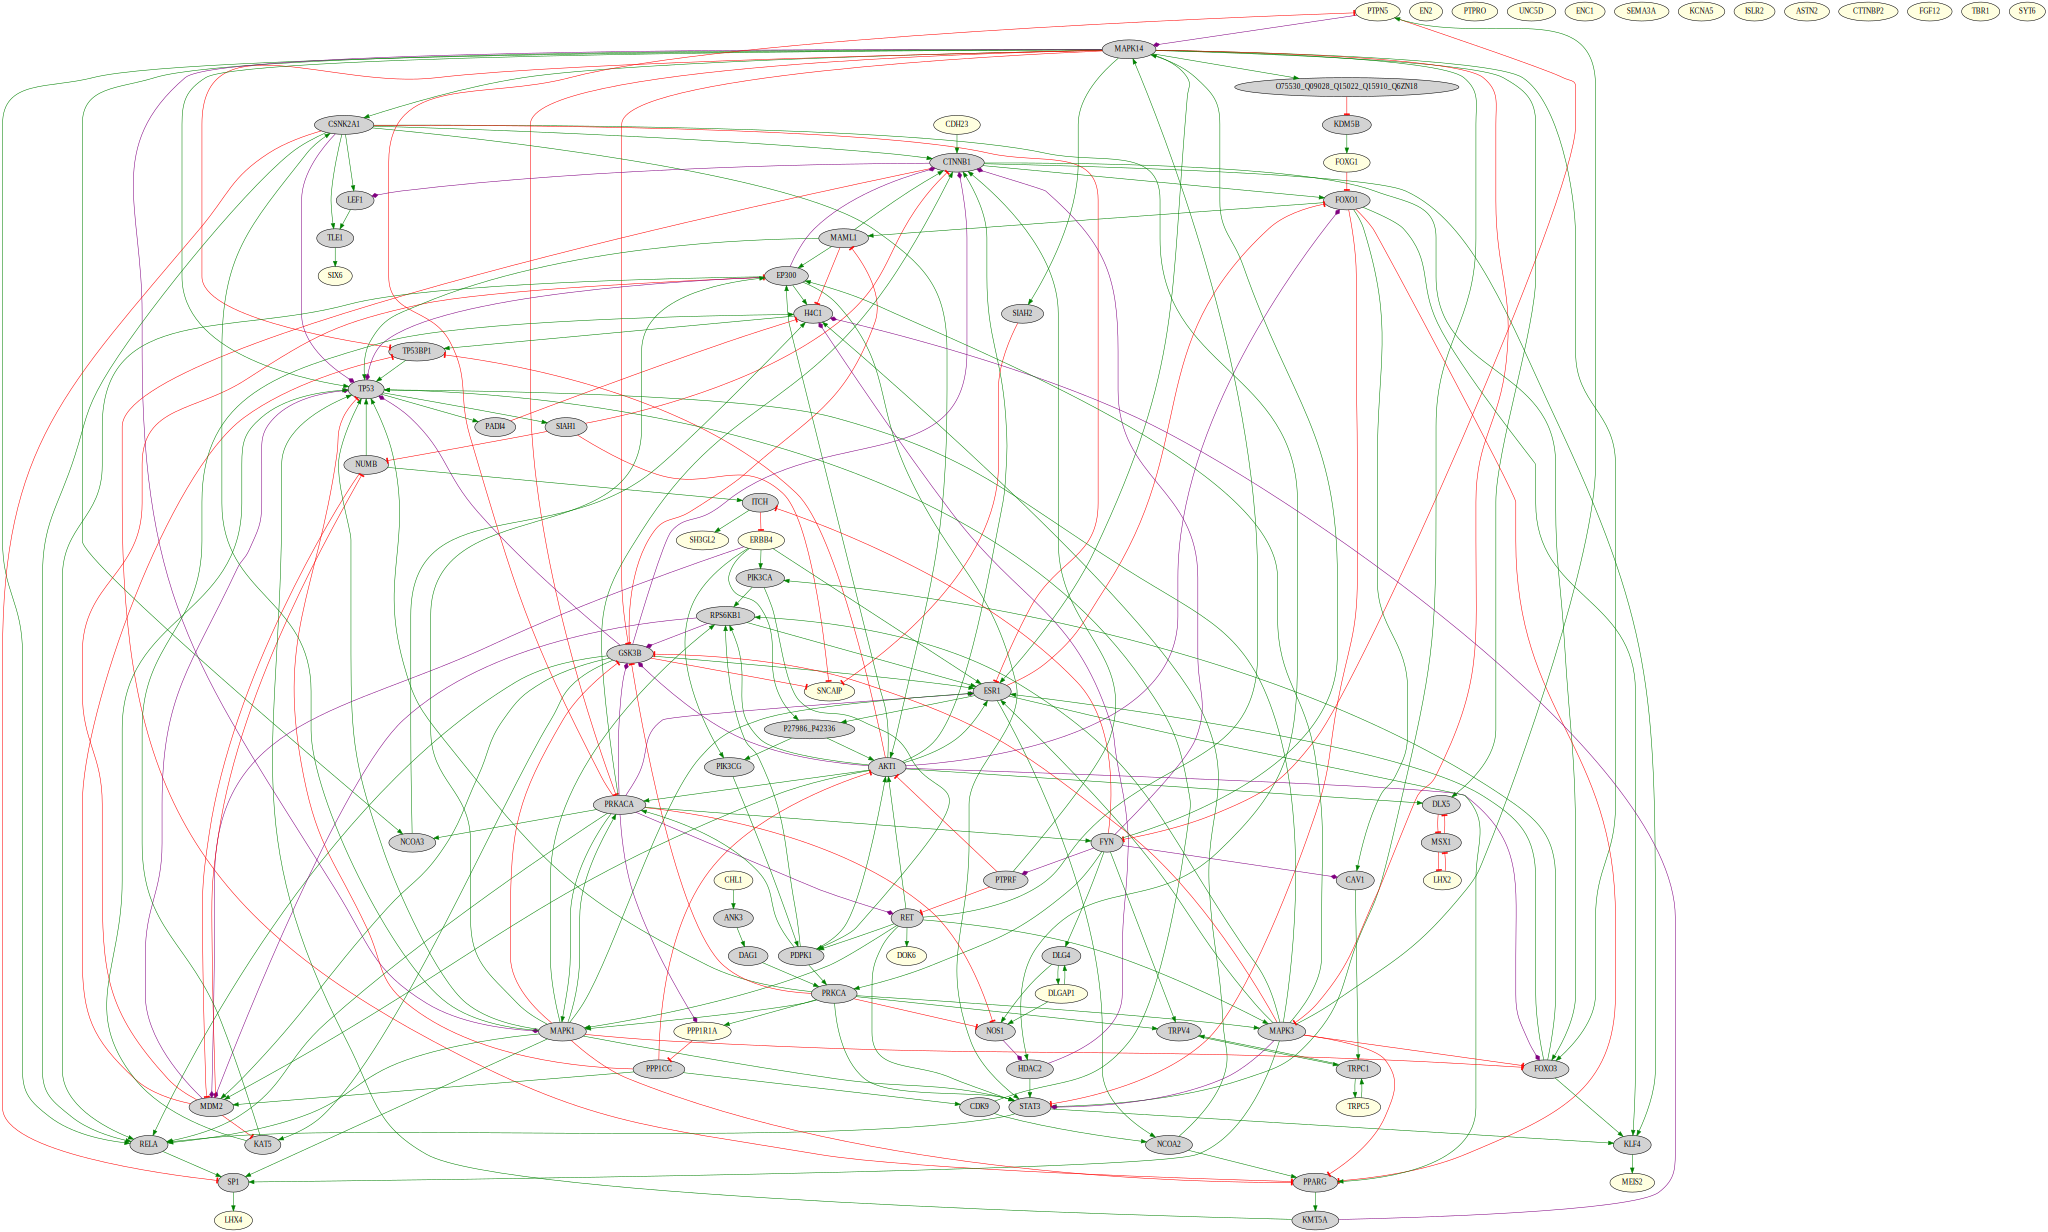

In [13]:
group4_visualizer = NetworkVisualizer(group4_net,color_by='effect', noi=True)
output = figures_folder + "Group4_all_omnipath"
group4_visualizer.render(output_file=output)

# Exporting Network in sif file

In [14]:
from neko._outputs.exports import Exports

In [15]:
for node in group4_net.nodes["Uniprot"]:
    if group4_net.edges[group4_net.edges["source"].isin([node])].empty and group4_net.edges[group4_net.edges["target"].isin([node])].empty:
        print(group4_net.nodes[group4_net.nodes["Uniprot"] == node])
        group4_net.remove_node(node[0])

  Genesymbol Uniprot Type
3        EN2  P19622  NaN
  Genesymbol Uniprot Type
4      PTPRO  Q16827  NaN
  Genesymbol Uniprot Type
5      UNC5D  Q6UXZ4  NaN
  Genesymbol Uniprot Type
6       ENC1  O14682  NaN
  Genesymbol Uniprot Type
9     SEMA3A  Q14563  NaN
   Genesymbol Uniprot Type
10      KCNA5  P22460  NaN
   Genesymbol Uniprot Type
11      ISLR2  Q6UXK2  NaN
   Genesymbol Uniprot Type
15      ASTN2  O75129  NaN
   Genesymbol Uniprot Type
16    CTTNBP2  Q8WZ74  NaN
   Genesymbol Uniprot Type
17      FGF12  P61328  NaN
   Genesymbol Uniprot Type
21       TBR1  Q16650  NaN
   Genesymbol Uniprot Type
24       SYT6  Q5T7P8  NaN


In [16]:
export = Exports(group4_net)

In [17]:
export.export_sif(sif_output + "Group4_all_omnipath.sif")